In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/19919867648_043cf02fc3.jpg'),
 PosixPath('datasets/flower_photos/roses/12562723334_a2e0a9e3c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376473742_532364cee5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg')]

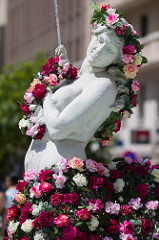

In [7]:
PIL.Image.open(str(roses[5]))

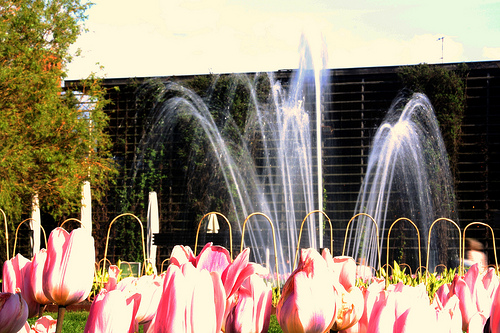

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read Data into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/19919867648_043cf02fc3.jpg'),
 PosixPath('datasets/flower_photos/roses/12562723334_a2e0a9e3c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376473742_532364cee5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1392579828_ab5a139052.jpg'

In [13]:
import cv2

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scaling images

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.3495 - loss: 1.5079
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5926 - loss: 1.0170
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6656 - loss: 0.8471
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7718 - loss: 0.6212
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8525 - loss: 0.3946
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9316 - loss: 0.2253
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9786 - loss: 0.0967
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9846 - loss: 0.0606
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9887 - loss: 0.0423
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9980 - loss: 0.0136
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9876 - loss: 0.0437
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.994

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 502ms/step - accuracy: 0.6460 - loss: 3.0536


[2.8942368030548096, 0.6644880175590515]

# Improving the model using data augmentation

In [25]:
img_height, img_width = 180,180
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


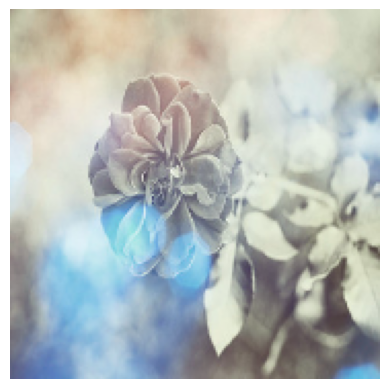

In [36]:
plt.axis('off')
plt.imshow(X[188])

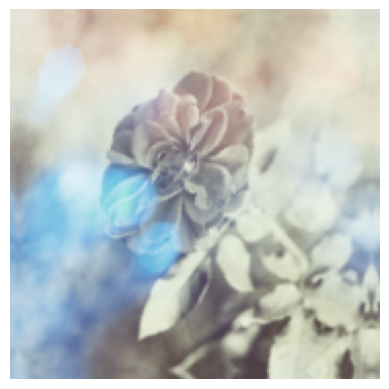

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[188].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [38]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3644 - loss: 1.5346
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.5603 - loss: 1.0845
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6366 - loss: 0.9453
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6736 - loss: 0.8447
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6906 - loss: 0.8145
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7058 - loss: 0.7697
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7269 - loss: 0.7241
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7258 - loss: 0.7074
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7382 - loss: 0.6684
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7606 - loss: 0.6302
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7609 - loss: 0.6353
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy:

In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - accuracy: 0.7361 - loss: 0.8774


[0.9456977844238281, 0.7352941036224365]

In [40]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 372ms/step


array([[-5.8465953 , 17.729486  , -0.9656918 , -4.985573  , -3.4501092 ],
       [ 3.9971082 ,  1.9874612 , -2.7717586 , -1.2994051 ,  3.6808743 ],
       [-0.68603414,  0.02591297,  4.106735  , -1.0365866 , -1.8281833 ],
       ...,
       [ 5.7228546 , -3.6730592 ,  3.778446  ,  9.2099495 ,  3.7113655 ],
       [ 4.139019  ,  5.6275496 ,  2.3925462 , -5.597511  ,  3.4268725 ],
       [-3.1660092 , -7.5992966 ,  3.4833517 , 11.294976  ,  0.5994126 ]],
      dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[0])

In [43]:
np.argmax(score)


1

In [44]:
y_test[0]

1

# Saving the model

In [49]:
import pickle

save_dir = './artifacts/'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

with open(os.path.join(save_dir, 'model.pkl'), 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as a binary file in {save_dir}")

Model saved as a binary file in ./artifacts/
